In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [237]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\CarPrice_Assignment.csv')
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [178]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [179]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [180]:
df['Car Brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

In [181]:
df['Car Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [182]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [183]:
df.duplicated().sum()

0

In [184]:
df.drop(columns=['car_ID','CarName'],inplace=True)

In [185]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car Brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [186]:
df['Car Brand'].nunique()

27

In [187]:
brand_corrections = {'porchshe':'porshce',
                     'toyouta':'toyota',
                     'vokswagen':'volkswagen',
                     'vw':'volkswagen',
                     'maxda':'mazda'}
    

In [188]:
df['Car Brand'] = df['Car Brand'].replace(brand_corrections)

In [189]:
df['Car Brand'].nunique()

23

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [191]:
categorical_columns = df.select_dtypes(include='object')

In [192]:
categorical_columns

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Car Brand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [193]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns = numerical_columns.drop('price')

In [194]:
numerical_columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [195]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [196]:
df[numerical_columns].skew()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
dtype: float64

In [197]:
df[numerical_columns].kurtosis()

symboling          -0.676271
wheelbase           1.017039
carlength          -0.082895
carwidth            0.702764
carheight          -0.443812
curbweight         -0.042854
enginesize          5.305682
boreratio          -0.785042
stroke              2.174396
compressionratio    5.233054
horsepower          2.684006
peakrpm             0.086756
citympg             0.578648
highwaympg          0.440070
dtype: float64

<Axes: xlabel='price', ylabel='Count'>

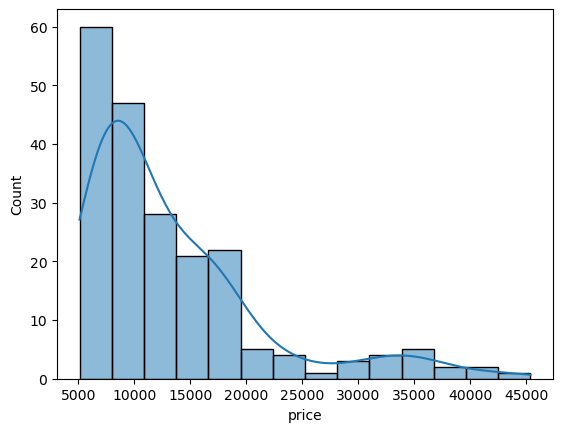

In [198]:
# Visualizing the distribution of target column
sns.histplot(data=df,x='price',kde=True)

Text(0.5, 1.0, 'Box plot for Checking Outliers')

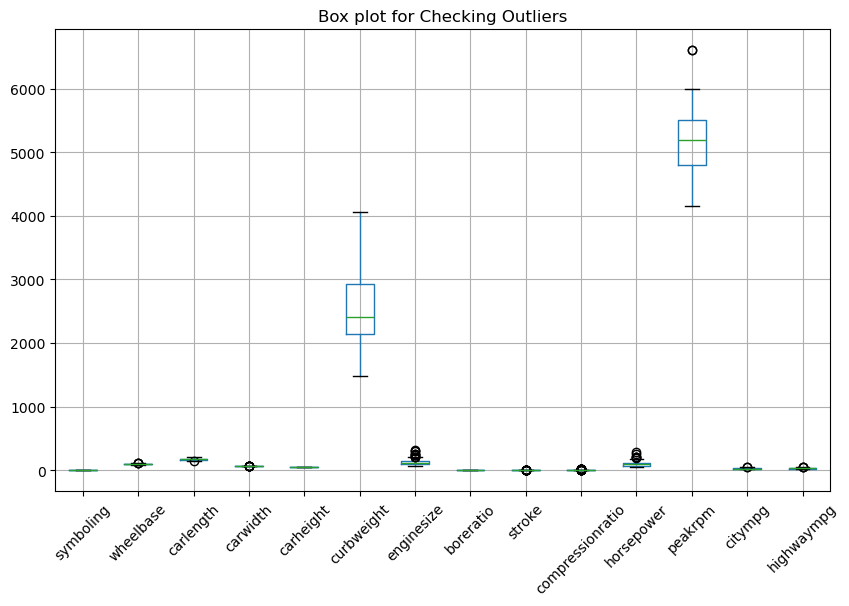

In [199]:
plt.figure(figsize=(10,6))
df[numerical_columns].boxplot(rot=45)
plt.title('Box plot for Checking Outliers')

In [200]:
for col in numerical_columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3-Q1

    lower_bound = Q1 - (1.5* IQR)
    upper_bound = Q3 + (1.5*IQR)
    df[col] = df[col].clip(lower = lower_bound,upper = upper_bound)
    
    


Text(0.5, 1.0, 'Boxplot after removing  Outliers')

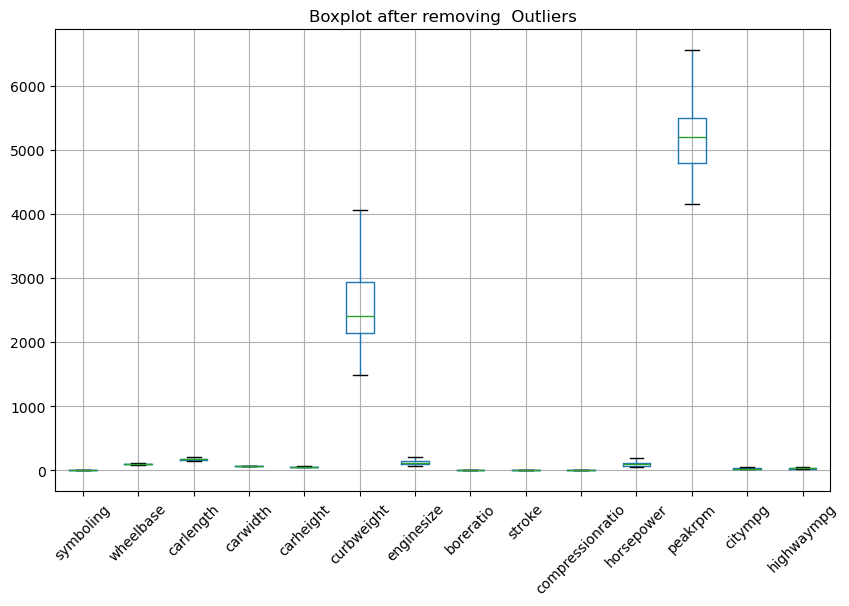

In [201]:
plt.figure(figsize=(10,6))
df[numerical_columns].boxplot(rot=45)
plt.title('Boxplot after removing  Outliers')

In [202]:
df[numerical_columns].skew()

symboling           0.211072
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginesize          0.908453
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
dtype: float64

In [203]:
df[numerical_columns].kurtosis()

symboling          -0.676271
wheelbase           0.480781
carlength          -0.082895
carwidth            0.309519
carheight          -0.443812
curbweight         -0.042854
enginesize          0.081191
boreratio          -0.785042
stroke              0.306554
compressionratio    0.124830
horsepower         -0.267304
peakrpm             0.006028
citympg             0.315340
highwaympg         -0.209547
dtype: float64

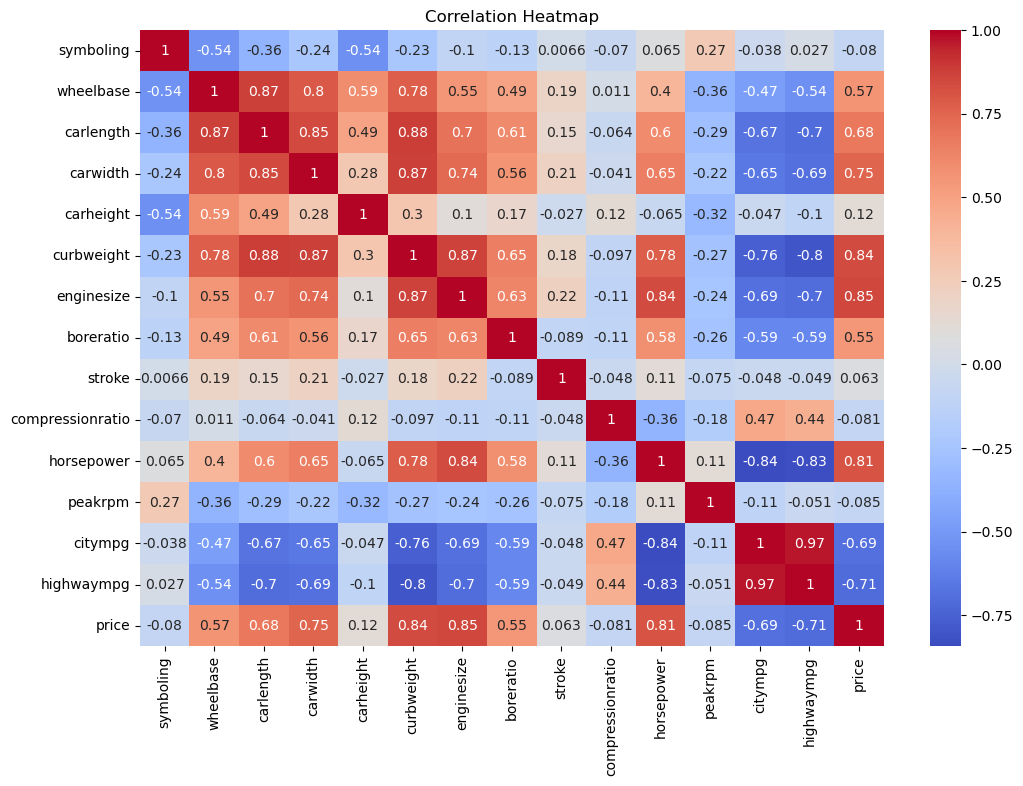

In [204]:
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize= (12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [205]:
# In heatmap the correlation of 0.97 between two input features(highwaympg and citympg) indicates very strong multicollinearity.
# Two input features are providing nearly same information, so drop both  column.
# Horsepower, Enginesize and curbweight have a strong positive correlation with price.

In [206]:
df.drop(columns=['highwaympg'], inplace=True)

In [207]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Car Brand']

In [208]:
df[categorical_columns].nunique()


fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
Car Brand         23
dtype: int64

In [209]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [210]:

df = pd.get_dummies(df,columns= categorical_columns, drop_first= True).astype(int)

In [211]:
X = df.drop(columns= ['price'])
y = df['price']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [213]:
X_train.shape

(164, 64)

In [214]:
X_test.shape

(41, 64)

In [215]:
y_train.shape

(164,)

In [216]:
y_test.shape

(41,)

In [217]:
numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg']

In [218]:
numerical_columns

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg']

In [219]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

In [220]:
X_train_scaled 

array([[-0.72738032,  0.96334338,  0.11527618, ..., -0.88372712,
        -1.92352751,  0.96431609],
       [-0.72738032,  1.46595732,  1.03544532, ..., -0.23037183,
        -0.29272422, -0.98812636],
       [-0.72738032, -0.54449843, -0.38663426, ..., -1.16779464,
        -0.70042504,  0.96431609],
       ...,
       [ 0.07863571, -0.71203641, -0.72124123, ..., -0.96894738,
         0.1149766 ,  0.96431609],
       [ 1.69066776,  0.62826742,  0.7844901 , ...,  1.6444738 ,
         0.1149766 , -0.98812636],
       [-0.72738032,  0.29319146,  0.86814184, ...,  1.38881303,
         0.1149766 , -1.31353343]])

In [221]:
# Scale numeric features and convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test.index)

# Extract encoded categorical columns
X_train_cat = X_train.drop(columns=numerical_columns)
X_test_cat = X_test.drop(columns=numerical_columns)

# Combine without resetting index
X_train_final = pd.concat([X_train_scaled_df, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_cat], axis=1)



In [222]:
X_train_final.shape

(164, 64)

In [223]:
X_test_final.shape

(41, 64)

# Model Implementation and Evaluation

In [225]:
model = {
    'Liner Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor' : SVR(kernel = 'linear')
}
result = []

In [226]:
for name, model in model.items():
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    result.append([name,r2,mse,mae])

In [227]:
result_df = pd.DataFrame(result,columns=['Model','R-square','MSE','MAE'])
print('\n Model performance comparison:')
print(result_df)


 Model performance comparison:
                         Model      R-square           MSE           MAE
0             Liner Regression -6.595741e+23  5.206948e+31  1.126937e+15
1      Decision Tree Regressor  9.380853e-01  4.887798e+06  1.569366e+03
2      Random Forest Regressor  9.525455e-01  3.746253e+06  1.359418e+03
3  Gradient Boosting Regressor  9.391016e-01  4.807566e+06  1.551869e+03
4     Support Vector Regressor  7.031847e-02  7.339287e+07  5.010708e+03


# Identifying the significant variables affecting car prices.

In [229]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_final,y_train)

importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns,'Importance':importances})
feature_importances_df= feature_importances_df.sort_values(by='Importance',ascending=False)

In [230]:
significant_features = feature_importances_df.head(10)
print('/nThe top 10 significant features are :')
print(significant_features)

/nThe top 10 significant features are :
          Feature  Importance
6      enginesize    0.557868
5      curbweight    0.326838
10     horsepower    0.034576
12        citympg    0.013999
1       wheelbase    0.008755
11        peakrpm    0.008377
43  Car Brand_bmw    0.008269
2       carlength    0.006753
3        carwidth    0.004720
4       carheight    0.003399


# Hyperparameter tuning

In [232]:
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,scoring='r2')
                          

In [233]:
grid_search_rf.fit(X_train_final,y_train)
y_pred_rf = grid_search_rf.predict(X_test_final)
best_rf = grid_search_rf.best_estimator_

best_rf_r2 = r2_score(y_test, y_pred_rf)
best_rf_mse = mean_squared_error(y_test, y_pred_rf)
best_rf_mae = mean_absolute_error(y_test, y_pred_rf)

best_model_results = {
    "Best Random Forest Model": {
        "R2 Score": best_rf_r2,
        "MSE": best_rf_mse,
        "MAE": best_rf_mae,
        "Best Parameters": grid_search_rf.best_params_
    }
}

print("\nHyperparameter Tuning Results:")
print("Best Random Forest Model:")
print(best_model_results["Best Random Forest Model"])



Hyperparameter Tuning Results:
Best Random Forest Model:
{'R2 Score': 0.9553395920561204, 'MSE': 3525675.569581339, 'MAE': 1312.2553818234612, 'Best Parameters': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}}


After performing hyperparameter tuning the performance increased only 0.02.